#Pandas

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [9]:
dir(pd)

['ArrowDtype',
 'BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_testing',
 '_typing',
 '_version',
 'annotations',
 'api',
 'array',
 'arrays',
 'bdate_range',
 'compat',
 'concat',
 'c

In [6]:
x1 = [1,2,3,4,5]
x2 = [3,4,5,6,7]
x3 = list(range(1,25,5))

result = pd.DataFrame(columns=['x1','x2','x3'])

#result = pd.DataFrame(columns=['1st','2nd','3rd'])


In [7]:
result

,x1,x2,x3


In [9]:
result['x1'] = x1
result['x2'] = x2
result['x3'] = x3

In [10]:
result

,x1,x2,x3
0,1,3,1
1,2,4,6
2,3,5,11
3,4,6,16
4,5,7,21


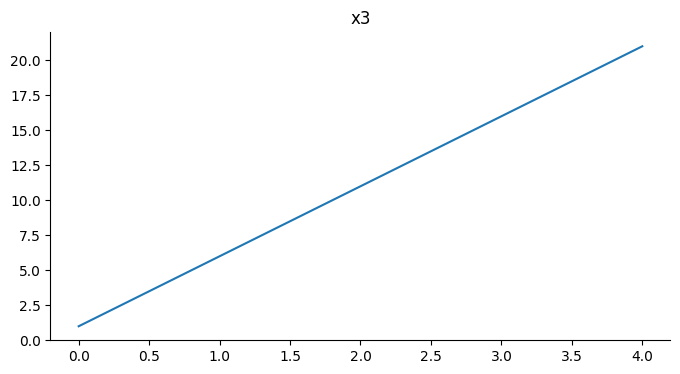

In [41]:
# @title x3

from matplotlib import pyplot as plt
result['x3'].plot(kind='line', figsize=(8, 4), title='x3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
result1 = pd.DataFrame(columns=['1st','2nd','3rd'])

In [13]:
result1['1st'] = x1
result1['2nd'] = x2
result1['3rd'] = x3
result1

,1st,2nd,3rd
0,1,3,1
1,2,4,6
2,3,5,11
3,4,6,16
4,5,7,21


##shallow copy

* it can also update in original data

In [14]:
# creating shallow copy
shallow = result1.copy(deep =False)
print(shallow)

   1st  2nd  3rd
0    1    3    1
1    2    4    6
2    3    5   11
3    4    6   16
4    5    7   21


In [15]:
#updating values in shallow copy
shallow['1st'][1]= 15
print(shallow)
print(result1)

   1st  2nd  3rd
0    1    3    1
1   15    4    6
2    3    5   11
3    4    6   16
4    5    7   21
   1st  2nd  3rd
0    1    3    1
1   15    4    6
2    3    5   11
3    4    6   16
4    5    7   21


##deep copy

* it does not change for original data also

In [16]:
# creating deep copy
shallow = result1.copy(deep = True)
print(shallow)

   1st  2nd  3rd
0    1    3    1
1   15    4    6
2    3    5   11
3    4    6   16
4    5    7   21


In [18]:
#updating values in deep copy
shallow['1st'][1]= 255
print(shallow)
print()
print(result1)

   1st  2nd  3rd
0    1    3    1
1  255    4    6
2    3    5   11
3    4    6   16
4    5    7   21

   1st  2nd  3rd
0    1    3    1
1   15    4    6
2    3    5   11
3    4    6   16
4    5    7   21


In [30]:
result1['1st'] = pd.Series(x1)
result1['2nd'] = pd.Series(x2)
result1['3rd'] = pd.Series(x3)
print(result1)

   1st  2nd  3rd
0    1    3    1
1    2    4    6
2    3    5   11
3    4    6   16
4    5    7   21


In [33]:
result.x1

0    1
1    2
2    3
3    4
4    5
Name: x1, dtype: int64

In [35]:
result1[['1st','2nd']]

,1st,2nd
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7


## accessing columns

* iloc (index location)

In [36]:
print(result.columns)

Index(['x1', 'x2', 'x3'], dtype='object')


In [51]:
print(result.iloc[0:3,1]) #3 rows 1 columns
# 0-3 is rows and 1 is column

0    3
1    4
2    5
Name: x2, dtype: int64


In [50]:
print(result)

   x1  x2  x3
0   1   3   1
1   2   4   6
2   3   5  11
3   4   6  16
4   5   7  21


In [57]:
print(result.iloc[0:,:3]) #entire data

   x1  x2  x3
0   1   3   1
1   2   4   6
2   3   5  11
3   4   6  16
4   5   7  21


In [70]:
print(result.iloc[0:2,0:]) #entire data

   x1  x2  x3
0   1   3   1
1   2   4   6


##Merge()

* it only merge only common like intersection

In [72]:
#merge

df1 =pd.DataFrame({'Col1':[10,20,30,40,50],'Col2':[5,15,25,35,45]})

print(df1)

   Col1  Col2
0    10     5
1    20    15
2    30    25
3    40    35
4    50    45


In [81]:
df2 =pd.DataFrame({'Col1':[20,40,60,80,100],'Col2':[30,60,90,120,150]})
print(df2)

   Col1  Col2
0    20    30
1    40    60
2    60    90
3    80   120
4   100   150


In [82]:
df_merge = pd.merge(df1,df2) # it merge only common elements

In [80]:
df_merge

,Col1,Col2


#joining()

In [93]:
data_frame1 = pd.DataFrame({"X1":[10,20,25,30,35],"X2":[5,15,35,55,65]}, index=(2001,2002,2003,2004,2005))

In [94]:
data_frame2 = pd.DataFrame({"X3":[10,20,25,30,35],"X4":[5,15,35,55,65]}, index=(2003,2002,2001,2006,2008))

In [95]:
print(data_frame1)

      X1  X2
2001  10   5
2002  20  15
2003  25  35
2004  30  55
2005  35  65


In [96]:
print(data_frame2)

      X3  X4
2003  10   5
2002  20  15
2001  25  35
2006  30  55
2008  35  65


In [97]:
joining = data_frame1.join(data_frame2)

In [99]:
print(joining)

      X1  X2    X3    X4
2001  10   5  25.0  35.0
2002  20  15  20.0  15.0
2003  25  35  10.0   5.0
2004  30  55   NaN   NaN
2005  35  65   NaN   NaN


In [100]:
joining1 = data_frame2.join(data_frame1)

In [104]:
joining1

,X3,X4,X1,X2
2003,10,5,25.0,35.0
2002,20,15,20.0,15.0
2001,25,35,10.0,5.0
2006,30,55,NaN,NaN
2008,35,65,NaN,NaN


In [115]:
df = pd.DataFrame({"X1":[10,20,25,30,35],"X2":[5,15,35,55,65]})

In [117]:
#replace index name

df.set_index("X1", inplace =True) #assigning index value using column name

In [119]:
df

,X2
X1,
10,5
20,15
25,35
30,55
35,65


In [120]:
# rename column name

df1 =pd.DataFrame({'Column1':[10,25,35,45,60],'Column2':[1,2,3,4,5]})

In [121]:
df1

,Column1,Column2
0,10,1
1,25,2
2,35,3
3,45,4
4,60,5


In [129]:
x =df1.rename(columns={'Column1':'Column_updated'})

In [130]:
print(x)

   Column_updated  Column2
0              10        1
1              25        2
2              35        3
3              45        4
4              60        5


#Concatenate

In [135]:
#concatenate
df3 = pd.DataFrame({"X1":[10,20,25,30,35],"X2":[5,15,35,55,65]})
df4 = pd.DataFrame({'Column1':[10,25,35,45,60],'Column2':[1,2,3,4,5]})

concatenate = pd.concat([df4,df3])

In [136]:
concatenate

,Column1,Column2,X1,X2
0,10.0,1.0,NaN,NaN
1,25.0,2.0,NaN,NaN
2,35.0,3.0,NaN,NaN
3,45.0,4.0,NaN,NaN
4,60.0,5.0,NaN,NaN
0,NaN,NaN,10.0,5.0
1,NaN,NaN,20.0,15.0
2,NaN,NaN,25.0,35.0
3,NaN,NaN,30.0,55.0
4,NaN,NaN,35.0,65.0


In [137]:
dir (pd)

['ArrowDtype',
 'BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_testing',
 '_typing',
 '_version',
 'annotations',
 'api',
 'array',
 'arrays',
 'bdate_range',
 'compat',
 'concat',
 'c

# dict using pandas

* DataFrame()

In [147]:
import pandas as pd

my_data = {'Name':['obito','Rin','Hinata',"Naruto",'Sasuke','Sakura'],
           'Age':[14, 14, 15, 16, 18, 17,]}

print(my_data)

print("\n")
df = pd.DataFrame(my_data)
print(df)

{'Name': ['obito', 'Rin', 'Hinata', 'Naruto', 'Sasuke', 'Sakura'], 'Age': [14, 14, 15, 16, 18, 17]}


     Name  Age
0   obito   14
1     Rin   14
2  Hinata   15
3  Naruto   16
4  Sasuke   18
5  Sakura   17


In [150]:
df['Name'][0]

'obito'